In [11]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Style configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

# Load the data
df = sns.load_dataset('titanic')

# Initial analysis
print("Dataset dimensions:", df.shape)
print("\nFirst rows:")
df.head()

Dataset dimensions: (891, 15)

First rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# General information
df.info()
df.describe()

# Checking for null values
null_counts = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Count': null_counts, 'Percentage': null_percentage})
print(null_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
             Count  Percentage
survived         0    0.000000
pclass           

In [3]:
# Dealing with missing values
df = df.drop(columns=['deck'])
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [4]:
# Checking for null values
null_counts = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Count': null_counts, 'Percentage': null_percentage})
print(null_df)

             Count  Percentage
survived         0         0.0
pclass           0         0.0
sex              0         0.0
age              0         0.0
sibsp            0         0.0
parch            0         0.0
fare             0         0.0
embarked         0         0.0
class            0         0.0
who              0         0.0
adult_male       0         0.0
embark_town      0         0.0
alive            0         0.0
alone            0         0.0


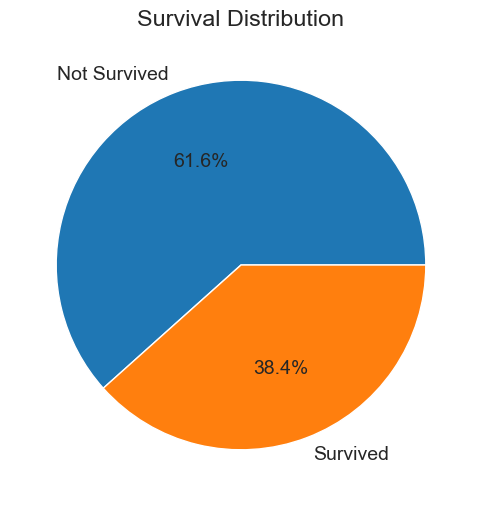

In [12]:
# Analysis of the target variable (Survived)
survived_counts = df['survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Distribution')
plt.savefig('../images/survival_distribution.png')
plt.show()

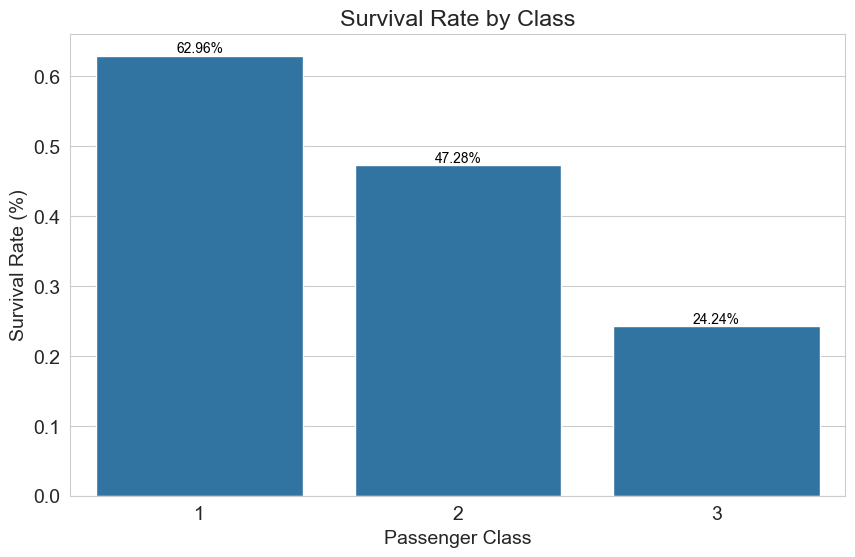

In [47]:
# Survival by class
class_survival = pd.crosstab(df['pclass'], df['survived'])
class_survival_percentage = class_survival.div(class_survival.sum(1).astype(float), axis=0) * 100

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pclass', y='survived', data=df, errorbar=None)

# Adding percentage labels on top of bars
for p in ax.patches:
    value = p.get_height() * 100
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f'{value:.2f}%',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class')
plt.savefig('../images/survival_by_class.png')
plt.show()


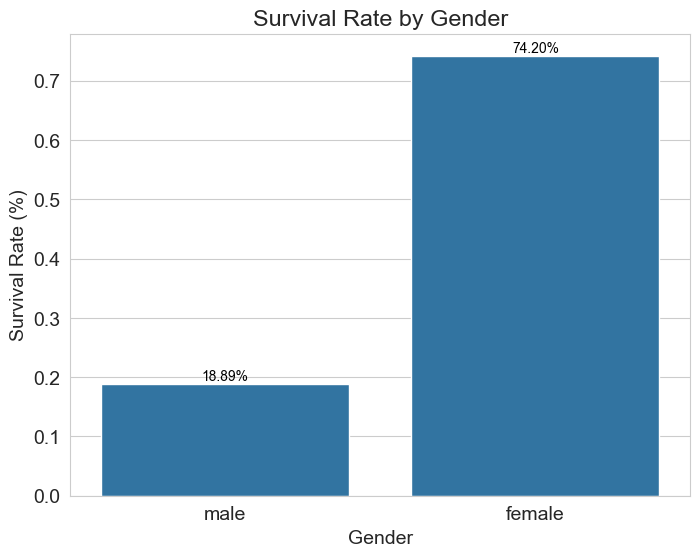

In [46]:
# Survival by gender
gender_survival = pd.crosstab(df['sex'], df['survived'])

# Visualization
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sex', y='survived', data=df, errorbar=None)

# Adding percentage labels on top of bars
for p in ax.patches:
    value = p.get_height() * 100
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f'{value:.2f}%',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.savefig('../images/survival_by_gender.png')
plt.show()

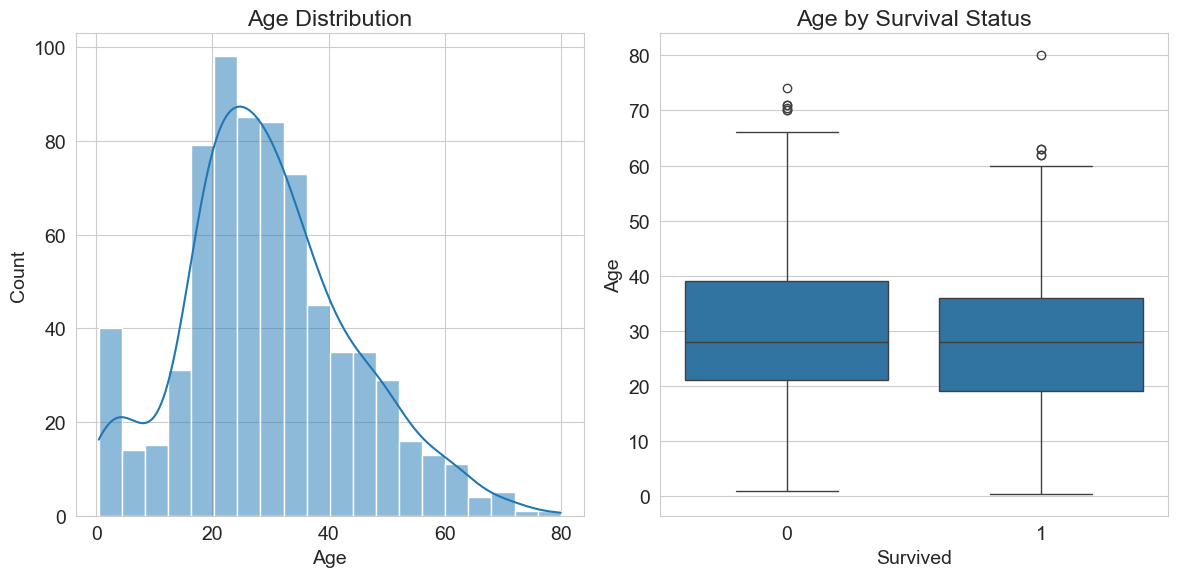

In [22]:
# Age distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'].dropna(), kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x='survived', y='age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age by Survival Status')

plt.tight_layout()
plt.savefig('../images/age_analysis.png')
plt.show()

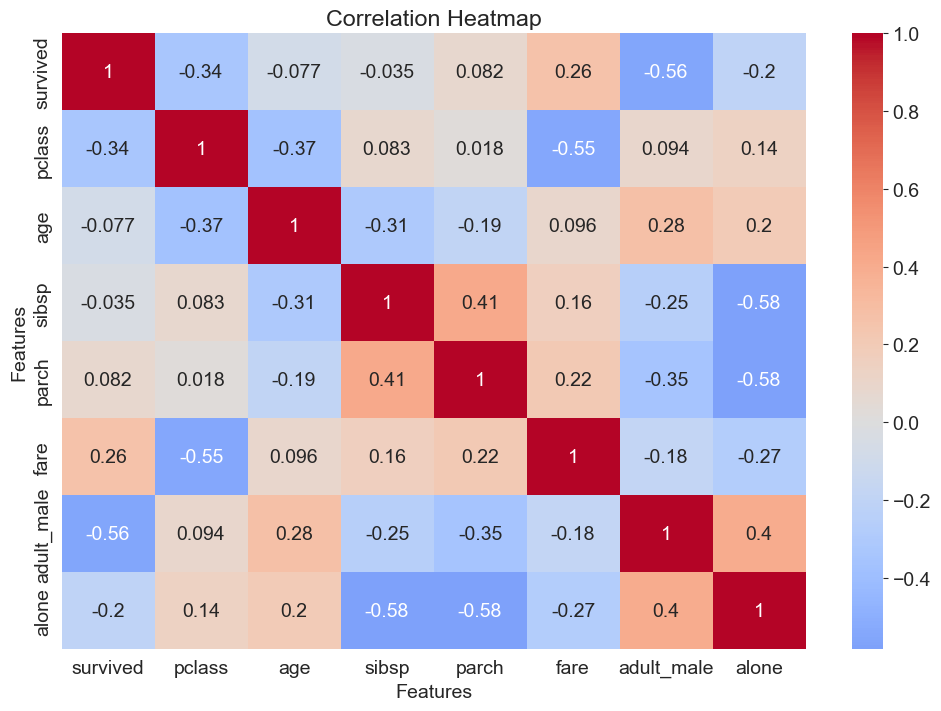

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png')
plt.show()

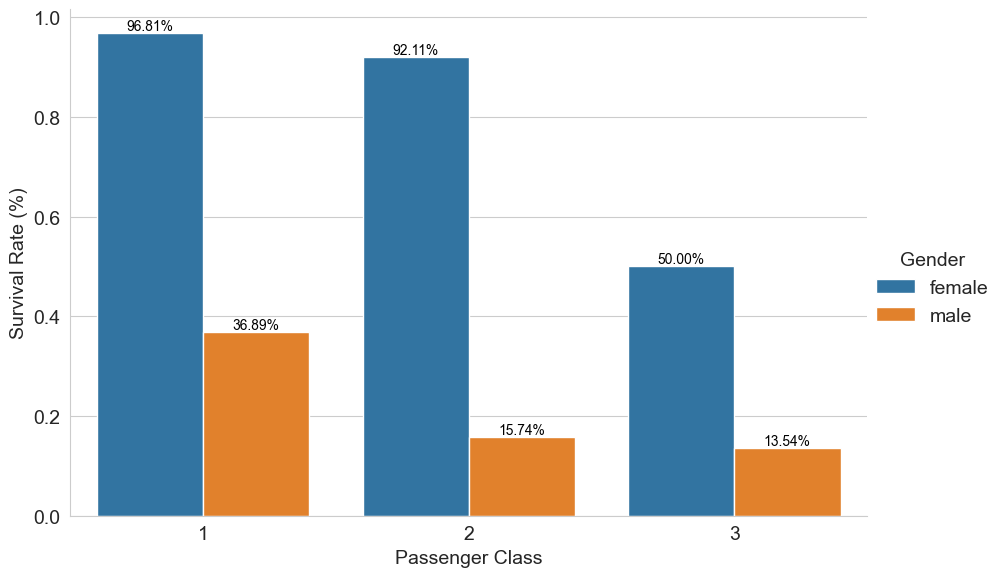

In [49]:
# Survival by class and gender
g = sns.catplot(
    x='pclass',
    y='survived',
    hue='sex',
    kind='bar',
    data=df,
    errorbar=None,
    height=6,
    aspect=1.5
)

# Adding percentage labels only for bars with height > 0
for p in g.ax.patches:
    height = p.get_height()
    value = height * 100
    if height > 0:  # só adiciona se a altura for maior que zero
        g.ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{value:.2f}%',
            ha='center', va='bottom', fontsize=10, color='black'
        )

g.set_axis_labels("Passenger Class", "Survival Rate (%)")
g.set_titles("Survival Rate by Class and Gender")
g._legend.set_title("Gender")

plt.savefig('../images/survival_by_class_gender.png')
plt.show()